<a href="https://colab.research.google.com/github/krigor-cintra/Aividade_Java-OOP/blob/main/python_pandas_b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Criação de um df ( Dataframe) com todas as plainlhas extaidas sem duplicidades 

In [10]:
dataframe_2021 = pd.read_excel('/dataframe/movimentacao-2021-01-01-a-2021-12-31.xlsx')
dataframe_2022 = pd.read_excel('/dataframe/movimentacao-2022-01-01-a-2022-12-31.xlsx')
dataframe_2023 = pd.read_excel('/dataframe/movimentacao-2022-01-01-a-2022-12-31.xlsx')

Arquivos

In [18]:
df = pd.concat([dataframe_2021, dataframe_2022, dataframe_2023], axis=0, ignore_index=True, verify_integrity=True)
df=df.drop_duplicates() ##Forma de eliminar duplicadas, simples levando em consideração a quantidade de dados
df.to_excel('dataframme.xlsx', index=False) #transformando em excel o dataframe criado ( junção dos 3 df extraidos da b3)

Criando uma nova column apartir da coluna produto, para obter o papel da ação

In [19]:
df["Código"]= df["Produto"].str.split(" ").str.get(0) 
#Utilizando a coluna produto, na qual tem o codigo do papale e nome obtive uma coluna com somente o codigo


Criação de uma dataframe que contem todos os recebimentos ( jpc, dividendo, rendimento)

In [20]:
df_recebimento= df[(df["Movimentação"] =="Juros Sobre Capital Próprio") | (df["Movimentação"] =="Dividendo") | (df["Movimentação"] =="Rendimento")]

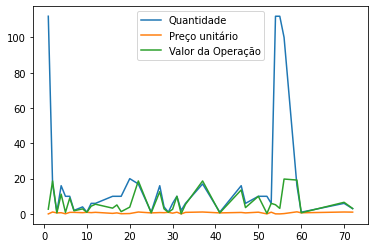

In [28]:
df_recebimento.plot()

In [37]:
df_recebimento.head()

,Entrada/Saída,Data,Movimentação,Produto,Instituição,Quantidade,Preço unitário,Valor da Operação,Código
1,Credito,29/12/2022,Dividendo,B3SA3 - B3,INTER DISTRIBUIDORA DE TITULOS E VALORES MOBIL...,112.0,0.02,2.71,B3SA3
2,Credito,26/12/2022,Rendimento,MORC11 - MORE RECEBIVEIS IMOBILIARIOS FII - FII,INTER DISTRIBUIDORA DE TITULOS E VALORES MOBIL...,17.0,1.1,18.7,MORC11
3,Credito,20/12/2022,Rendimento,MORE11 - MORE REAL ESTATE FOF FII FII,INTER DISTRIBUIDORA DE TITULOS E VALORES MOBIL...,1.0,0.6,0.6,MORE11
4,Credito,16/12/2022,Rendimento,IRDM11 - FII IRIDIUM RECEBIVEIS IMOBILIARIOS,INTER DISTRIBUIDORA DE TITULOS E VALORES MOBIL...,16.0,0.7,11.22,IRDM11
5,Credito,15/12/2022,Dividendo,RAIZ4 - RAIZEN S.A.,INTER DISTRIBUIDORA DE TITULOS E VALORES MOBIL...,10.0,0.09,0.89,RAIZ4


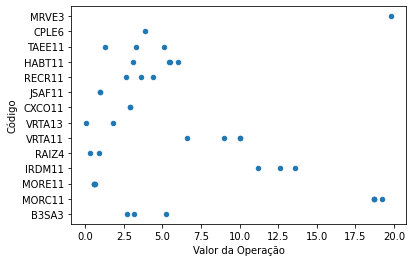

In [53]:
df_recebimento.plot.scatter(y="Código", x="Valor da Operação", alpha=1)

In [ ]:
df[(df["Código"].str.len() >=6) & (df["Movimentação"] != "Rendimento") & (df["Movimentação"] !=  "Dividendo")]